<a href="https://colab.research.google.com/github/brayannmb/Data-Science/blob/main/projeto_criminalidade_rio_janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de Dados da Criminalidade no Rio de Janeiro**

Saudações a uma das mais belas cidades do mundo! Com toda certeza, você conhece a **1ª cidade a ser reconhecida pela UNESCO como Patrimônio Cultural da Humanidade** por sua beleza cultural esplêndida… Não conhece? Sem problemas, pois, eu também não a conhecia antes deste projeto.
 
Estou falando da cidade do Rio de Janeiro, a partir de 2012 foi nomeada como um Patrimônio Cultural Mundial, por se tratar de uma cidade que contém uma paisagem cultural magnifica. 

Contendo a maior floresta urbana do mundo, a Floresta da Tijuca, onde está localizado um dos mais belos cartões postais do Brasil, o **Cristo Redentor**. 
O Rio, realmente é uma cidade diferente das outras, com pontos turísticos memoráveis procurados por muitos turistas do mundo afora.

Diante disso, neste notebook irei analisar indicadores de crimes da cidade que se diz "maravilhosa". Os dados foram disponibilizados através do portal do governo
carioca [ISPDados](http://www.ispdados.rj.gov.br/).

<center><img width= '70%' src= "https://github.com/brayannmb/Data-Science/blob/main/projeto_criminalidade_rio/foto_rio.jpg?raw=true"></center>

<center>Créditos Vector Juice</center>

##**Obtenção dos Dados**

Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).

###**Importação dos dados**

In [1]:
#instalando biblioteca pywaffle
! pip install pywaffle -q

     |████████████████████████████████| 532kB 7.6MB/s 


In [2]:
# importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

#estilo seaborn
sns.set()

In [3]:
#importando os dados para o objeto df

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")


###**Dicionário de Variáveis**
A grande maioria das variáveis são de fácil compreensão, por estarem em nossa língua nativa, mas algumas variáveis estão disponibilizadas em formato de siglas, dificultando o entendimento.

Variáveis em formato de siglas:

* `apf`: auto de prisão em flagrante
* `aaapai`: auto de apreensão de adolescente por prática de ato infracional
* `cmp`: cumprimento de mandado de prisão
* `cmba`: cumprimento de mandado de busca e apreensão

###**Explorando o Dataframe**
Agora, vamos analisar as primeiras 5 linhas do nosso dataset e também as 5 ultímas, buscando encontrar diferenças nos crimes do Rio de Janeiro de 1991 para o ano 2019.

In [4]:
# visualizando as primeiras 5 linhas do nosso dataset
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [5]:
# visualizando as primeiras 5 linhas do nosso dataset
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Nota-se que o ano de 2019 não contém todos os meses preenchidos.

Como podemos ver, realmente temos uma mudança do começo do nosso dataset, para as últimas linhas mais atuais.

Nas primeiras entradas do nosso dataset é possível observar a **quantidade de valores ausentes**, enquanto no nas últimas 5 entradas nós não temos valores ausentes em nenhuma das variáveis.

Bom, podemos pensar que são valores ausentes é provável que não tenha acontecido nenhum destes crimes nestes anos. Realmente, alguns sim, como por exemplo a variável `roubo_celular`, é bem provável que não tenha relatos de roubos de celulares no ano de 1991, por este crime ter uma recorrência mais atual, e sem contar que, em 1991 só fazia 1 ano da chegada dos celulares no Brasil segundo [Agência Brasil](https://agenciabrasil.ebc.com.br/geral/noticia/2020-10/hoje-e-dia-chegada-do-celular-ao-brasil-completa-30-anos#:~:text=A%20primeira%20chamada%2C%20no%20Rio,mais%20celular%20do%20que%20gente.).


###**Dimensões do Dataframe**

Sempre que estamos iniciando uma análise, devemos conhecer as dimensões do Dataframe. Executaremos o comando `info()`, que além de nos resultar as dimensões do nosso dataset, nos traz informações como: valores ausentes, tipos dos dados, quantidade de variáveis e memória usada.   

In [6]:
#extraindo informações básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

Executando o comando `info()`, já conseguimos extrair grandes informações do nosso dataset, como:
* A quantidade de entradas e variáveis, que são: **344 entradas e 56 variáveis**;
* Em nossas variáveis estão presentes os tipos de dados: float64 e int64;
* Variáveis com um grande indíce valores ausentes, que são: `roubo_bicicleta` e `furto_bicicleta`, cada uma com apenas **68 valores válidos**;

##**Dados Ausentes**

###**Quantos dados ausentes existem no Dataset?**

Primeiro vamos descobrir a quantidade valores ausentes e depois a porcentagem que estes valores representam no *dataset*.

In [7]:
#quantidade de valores ausentes por variável
df.isna().sum().sort_values(ascending=False)[:30]

roubo_bicicleta               276
furto_bicicleta               276
apreensao_drogas_sem_autor    180
posse_drogas                  180
apf                           180
aaapai                        180
cmp                           180
trafico_drogas                180
cmba                          180
sequestro_relampago           144
furto_coletivo                144
extorsao                      144
furto_celular                 144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estupro                       144
estelionato                   144
pol_civis_mortos_serv         144
pol_militares_mortos_serv     144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
lesao_corp_culposa             96
ameaca                         96
sequestro                      96
lesao_corp_morte               96
registro_ocorrencias           96
hom_por_interv_policial        84
hom_culposo   

Podemos visualizar o tamanho do problema quando um *dataset* que possui 344 entradas, e duas de suas variáveis estão com **276 de seus valores faltantes**.

In [8]:
#porcentagem do valores ausentes 
invalid_value = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)[30:]

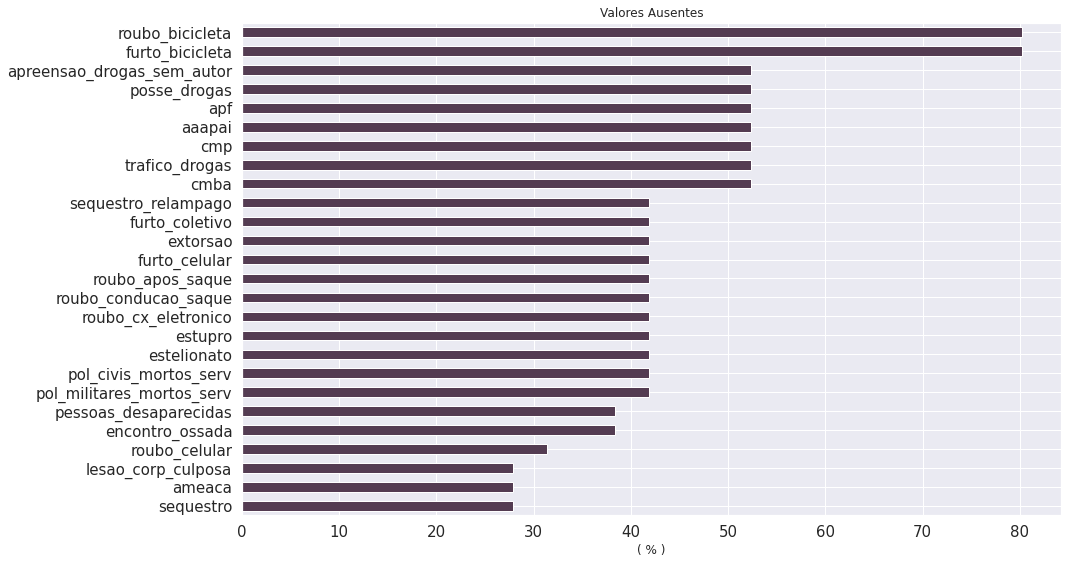

In [9]:
#confirgurando gráfico de barras
fig, ax = plt.subplots()
invalid_value.plot(kind= 'barh', fontsize=15, figsize=(15,8), ax=ax, color=['#543c52'])
ax.set_title("Valores Ausentes")
ax.set_xlabel("( % )")
plt.grid(color='w', linestyle='solid')
plt.tight_layout()

Nós temos variáveis com grandes proporções de valores ausentes, como crimes relacionados a bicicletas com **80%** e apreensão de drogas com **52%**.

Vamos descobrir quando começaram os indícios de valores faltantes no dataset.

In [10]:
#setando a variável vano como index, somando valores ausentes por ano
df.set_index('vano').isna().sum(level=0)

,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1991,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1992,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1993,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1994,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1995,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1996,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1997,0,0,12,0,12,0,0,12,12,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1998,0,0,12,0,0,0,0,12,0,12,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,12,12,12,12,0,12,12,12,0,12,12,12,12,12,12,0,12,12,12,0,0,0,12,0
1999,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,12,12,12,12,12,0,0,0,0,12,12,12,0,0,0,12,12,12,0,12,12,12,0,12,12,12,12,0,12,0,12,12,12,0,0,0,0,0


Foi analisado que os valores ausentes acabam no **ano de 2013**, tendo o restante dos anos com todos os seus valores validos.



In [11]:
#dados dos ultimos 10 anos
df.loc[216:335]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
216,2009,1,551,2.0,13,94.0,378,6631,381.0,189.0,3167.0,392,125,2573,212,6145,829,5,6.0,718.0,12.0,159.0,NaN,1156,12332,1789,2394,630.0,1990.0,NaN,7882,14685,0.0,73.0,7.0,1752.0,830,313.0,373.0,162.0,1883,1683.0,307.0,803.0,34.0,6033.0,465.0,41,1.0,3.0,0.0,660,7692,2573,56360.0,3
217,2009,2,556,4.0,19,75.0,383,6595,322.0,204.0,3230.0,381,136,2367,188,6279,788,3,5.0,659.0,12.0,173.0,NaN,1254,12245,1691,3241,637.0,1743.0,NaN,7416,14728,0.0,123.0,6.0,1644.0,854,356.0,358.0,166.0,1742,1584.0,319.0,793.0,61.0,5889.0,414.0,50,0.0,3.0,2.0,654,7726,2367,55116.0,3
218,2009,3,588,5.0,30,103.0,444,7183,441.0,239.0,3493.0,465,156,2564,236,6686,926,3,3.0,782.0,18.0,182.0,NaN,1442,13463,1830,2478,762.0,1892.0,NaN,7967,14929,1.0,128.0,2.0,1975.0,980,352.0,476.0,187.0,1880,1923.0,323.0,1108.0,59.0,6719.0,553.0,50,0.0,2.0,1.0,726,8394,2564,61430.0,3
219,2009,4,542,3.0,27,102.0,423,6705,359.0,189.0,3073.0,450,134,2310,226,6369,769,5,6.0,711.0,10.0,191.0,NaN,1150,12331,1759,2136,688.0,1673.0,NaN,7314,13570,1.0,118.0,5.0,1609.0,856,308.0,404.0,163.0,1788,1851.0,357.0,1038.0,58.0,5922.0,429.0,39,2.0,1.0,2.0,674,7849,2310,55492.0,3
220,2009,5,522,0.0,14,80.0,386,6565,372.0,194.0,3571.0,418,135,2340,236,6506,780,0,12.0,799.0,17.0,191.0,NaN,1139,12573,1679,2361,740.0,1761.0,NaN,7892,14433,2.0,112.0,8.0,1956.0,878,293.0,411.0,201.0,1795,1821.0,326.0,942.0,46.0,5904.0,401.0,29,3.0,3.0,2.0,616,8085,2340,57585.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2018,8,360,6.0,13,176.0,535,4655,433.0,157.0,2267.0,535,109,3910,673,7261,1400,2,2.0,2170.0,4.0,62.0,12.0,2620,18760,1398,1553,733.0,1302.0,162.0,6944,12092,0.0,149.0,12.0,3615.0,1994,694.0,1141.0,201.0,3368,3050.0,587.0,1727.0,260.0,4532.0,377.0,24,4.0,2.0,0.0,555,10831,3910,65797.0,3
332,2018,9,382,7.0,14,108.0,509,5344,489.0,157.0,2504.0,463,103,4053,578,6756,1275,1,1.0,2182.0,9.0,160.0,16.0,2385,17982,1339,1419,655.0,1173.0,161.0,6686,11433,0.0,146.0,5.0,2809.0,1959,747.0,1062.0,183.0,2625,2798.0,470.0,1633.0,190.0,4666.0,386.0,17,1.0,4.0,0.0,511,10213,4053,62376.0,3
333,2018,10,383,2.0,11,127.0,491,5472,488.0,153.0,2382.0,454,95,4242,651,7360,1441,1,8.0,2477.0,9.0,83.0,18.0,2308,19147,1428,1597,735.0,1368.0,206.0,7036,12370,0.0,143.0,8.0,2959.0,1735,666.0,939.0,165.0,3176,2727.0,515.0,1105.0,171.0,4877.0,427.0,16,2.0,1.0,1.0,523,11278,4242,65589.0,3
334,2018,11,378,3.0,12,136.0,463,5277,424.0,153.0,2283.0,441,84,4074,725,7017,1384,5,3.0,2346.0,6.0,79.0,16.0,2363,18543,1325,1560,737.0,1357.0,176.0,6963,12118,1.0,121.0,4.0,2879.0,1716,664.0,931.0,160.0,2848,2754.0,489.0,1233.0,259.0,4657.0,410.0,24,2.0,1.0,0.0,529,10747,4074,63281.0,3


Considerando a ausência de dados nos meses finais do ano de 2019, irei considerar informações apenas até Dezembro de 2018. A análise exploratória começará no ano de 2009 para possamos analisar os últimos 10 anos da criminalidade no Rio de Janeiro.

Por serem menos relevantes e conterem um alto índice de valores ausentes, desconsiderei as variáveis `roubo_bicleta` e `furto_bicicleta`. 

##**Análise Exploratória de 2009 a 2018**

In [12]:
#criando um novo dataset 
df_clean= df.copy()

#limpando o dataset para restar apenas os 10 anos
df_clean.drop('roubo_bicicleta', axis=1, inplace=True)
df_clean.drop('furto_bicicleta', axis=1, inplace=True)
df_clean.drop('fase', axis=1, inplace=True)

df_clean.drop(range(216), inplace=True)
df_clean.drop([343,342,341,340,339,338,337,336], inplace=True)

#definindo as variáveis mes e ano como o index
df_clean.set_index(["mes","vano"], inplace=True)

###**Análise Estatística**
A análise estatística básica através do comando `describe()` se faz necessária para nós podermos entender melhor se neste dataset existem outliers, qual distribuição das variáveis, identificar falhas e seu uso se faz muito importante para após a limpeza testar a eficácia do tratamento de dados.

In [13]:
#estatísticas básicas
df_clean.describe()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,401.208333,3.508333,14.333333,67.300000,442.125000,6515.941667,425.583333,180.641667,3348.241667,510.325000,111.891667,2714.775000,485.850000,5944.991667,786.625000,2.200000,3.558333,1008.066667,8.058333,122.450000,1395.966667,13099.875000,1429.216667,2550.891667,816.125000,1554.291667,7784.758333,14192.983333,0.608333,139.400000,9.441667,2637.766667,1697.508333,678.975000,863.150000,190.083333,2025.683333,2544.466667,654.791667,1355.683333,81.958333,6083.550000,467.066667,41.208333,2.916667,1.783333,0.308333,486.350000,7739.683333,2714.775000,62142.491667
std,62.082880,2.173159,5.599120,33.070996,85.972886,1040.786074,61.316863,28.592999,680.237687,112.942327,18.969589,1063.478188,276.078744,1415.845951,348.490793,1.417774,2.496370,691.985752,3.828895,44.539445,673.048488,4173.223494,144.036304,742.718726,125.856966,271.519608,806.724949,1614.062659,0.972702,32.669828,4.803353,520.057426,487.191833,234.485507,255.116867,38.345748,658.618059,492.238310,230.126304,308.204095,50.445644,1098.961977,63.335273,10.512814,2.010825,1.578124,0.618970,85.187648,2337.072876,1063.478188,5830.881465
min,272.000000,0.000000,5.000000,15.000000,272.000000,2521.000000,230.000000,111.000000,848.000000,277.000000,49.000000,1413.000000,170.000000,2260.000000,345.000000,0.000000,0.000000,301.000000,1.000000,11.000000,782.000000,7740.000000,1159.000000,663.000000,167.000000,527.000000,3089.000000,5795.000000,0.000000,49.000000,1.000000,717.000000,827.000000,274.000000,358.000000,114.000000,1219.000000,1584.000000,265.000000,695.000000,21.000000,1409.000000,236.000000,16.000000,0.000000,0.000000,0.000000,334.000000,3298.000000,1413.000000,31231.000000
25%,357.750000,2.000000,11.000000,41.000000,371.250000,5709.500000,387.250000,157.000000,2914.000000,413.250000,99.500000,1761.000000,251.500000,4786.750000,545.000000,1.000000,2.000000,491.750000,5.000000,79.750000,919.750000,9717.500000,1321.000000,2166.000000,747.500000,1367.500000,7371.750000,13561.500000,0.000000,121.750000,6.000000,2240.500000,1286.000000,503.750000,638.750000,163.000000,1466.750000,2106.000000,461.750000,1141.750000,48.000000,5343.250000,427.000000,34.750000,1.000000,1.000000,0.000000,422.500000,5925.000000,1761.000000,57599.250000
50%,394.500000,3.000000,13.000000,61.500000,445.500000,6577.000000,423.500000,179.500000,3528.000000,507.500000,109.500000,2415.000000,378.500000,5610.500000,654.000000,2.000000,3.000000,690.000000,8.000000,132.500000,1109.000000,11963.000000,1396.000000,2507.500000,842.000000,1535.000000,7813.500000,14200.500000,0.000000,137.000000,8.000000,2770.000000,1793.500000,685.500000,940.000000,185.500000,1864.000000,2724.500000,612

Executando o comando describe temos algumas informações relevantes sobre alguns crimes, tendo seus valores máximos de:
* `lesao_corp_dolosa` com 9050 ocorrências;
* `roubo_transeunte` com 9669 ocorrências;
* `roubo_veiculo` com 5358 ocorrências.

Entre outros que analisaremos a seguir.



###**Análise Geral - Registro de Ocorrências**
Iniciarei as análises pela variável `registro_ocorrencias`, pois ela nos mostra de um modo geral todos os registros de crimes presentes nesse *dataset*. 

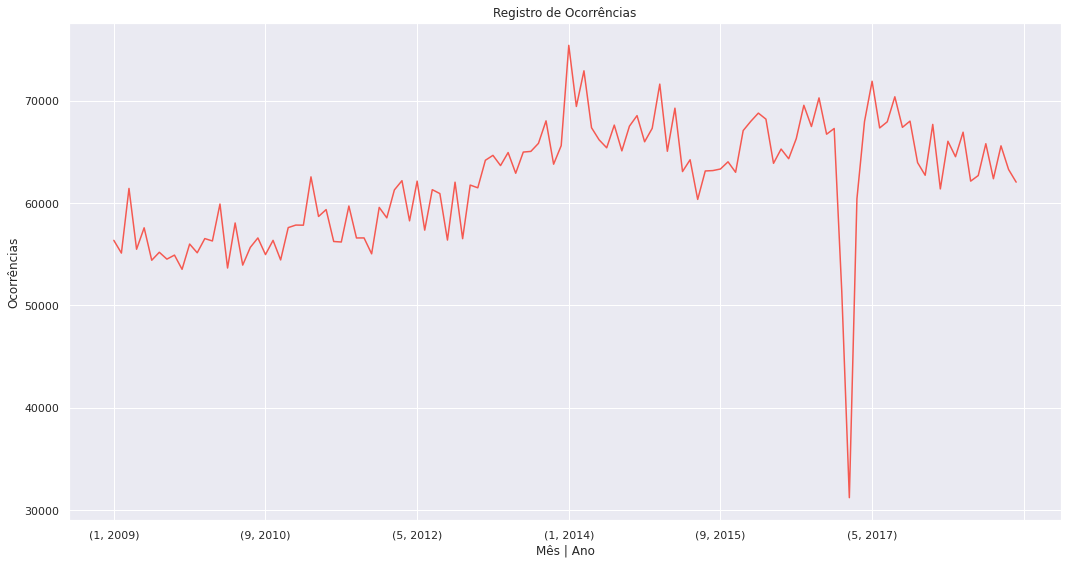

In [14]:
#configurando gráficos de linhas
fig, ax = plt.subplots()

df_clean.registro_ocorrencias.plot(figsize=(15,8), ax=ax, color=['#f55951']);
ax.set_xlabel('Mês | Ano')
ax.set_ylabel("Ocorrências")
ax.set_title("Registro de Ocorrências")
plt.tight_layout()


O gráfico acima mostra uma diminuição grande dos registros de ocorrências próximo ao ano de 2017, variando seus valores de quase **70 mil registros** para um pouco mais de **30 mil registros**.

Partindo dessa informação, o próximo tópico abordado será o ano de 2017, pois se faz necessário descobrir o porquê dessa queda tão repentina.

In [15]:
#identificando o pico máximo da variável registro de ocorrencias
media_dia = df_clean.registro_ocorrencias.max() / 31
print("Valor máximo de registros de ocorrencias de 2009 até 2018: \n{}\n".format(df_clean.registro_ocorrencias.max()))
print("Média por dia de crimes em Janeiro de 2014: \n{:.2f}".format(media_dia))

Valor máximo de registros de ocorrencias de 2009 até 2018: 
75403.0

Média por dia de crimes em Janeiro de 2014: 
2432.35


In [16]:
#buscando o ano com maior número de ocorrências
df_clean.loc[(df_clean.registro_ocorrencias == 75403), ['registro_ocorrencias']]

,,registro_ocorrencias
mes,vano,
1,2014,75403.0


In [17]:
#buscando os anos com os maiores números de ocorrências
df_clean.loc[(df_clean.registro_ocorrencias >= 70000), ['registro_ocorrencias']]

,,registro_ocorrencias
mes,vano,
1,2014,75403.0
3,2014,72915.0
1,2015,71617.0
10,2016,70271.0
5,2017,71895.0
8,2017,70380.0


Olhando para estes valores, percebemos que um mês após o maior número de crimes registrados, o Rio de Janeiro sofreu com o **segundo maior índice ocorrências**, com quase **73 mil crimes registrados**.

###**Ano de 2017**
Agora, irei investigar o que de fato aconteceu no ano de 2017, ano em que ocorreu a maior queda de crimes em 10 anos.

Primeiramente, irei plotar um gráfico de barras onde conterá os registros de todos os meses, assim, poderei descobrir quais os meses com os menores números de ocorrências registradas.

In [18]:
# criando um df apenas para o ano de 2017
df_2017 = df.loc[312:323].copy()

df_2017.drop('roubo_bicicleta', axis=1, inplace=True)
df_2017.drop('furto_bicicleta', axis=1, inplace=True)
df_2017.drop('fase', axis=1, inplace=True)

df_2017.set_index(["mes","vano"], inplace=True)

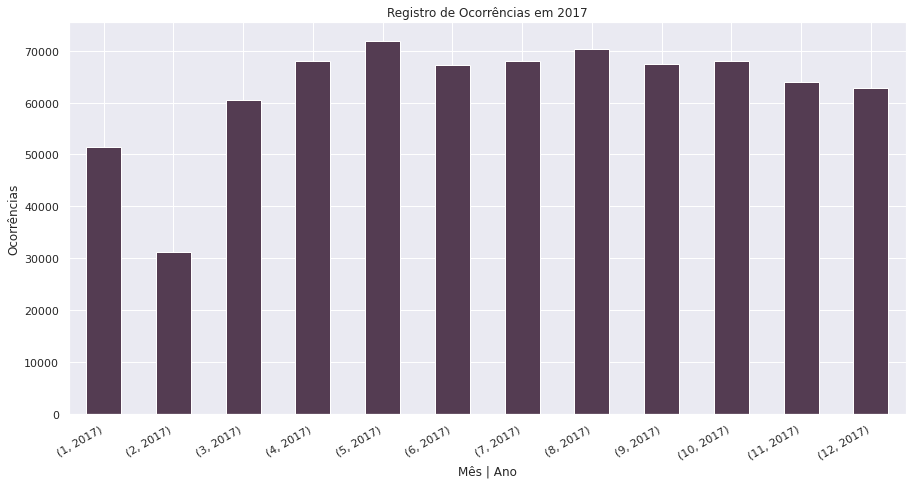

In [19]:
#configurando gráficos de barras
fig, ax = plt.subplots(figsize=(15,8))

df_2017.registro_ocorrencias.plot.bar(color=['#543c52'])
ax.set_title("Registro de Ocorrências em 2017")
ax.set_xlabel("Mês | Ano")
ax.set_ylabel("Ocorrências")
fig.autofmt_xdate()
plt.show()

O gráfico nos apresenta que o mês de Fevereiro de 2017 registrou o menor número ocorrências. Embora este mês tenha tido uma diminuição muito grande nos crimes, os próximos meses voltam a registrar altos valores de crimes.

Por ser o mês oficial do Carnaval aqui no Brasil, é provável que o Governo do Rio de Janeiro tenha aumentado o policiamento para a chegada de turistas.

**2 meses anteriores a Fevereiro de 2017:**

In [20]:
#registro de ocorrencias em Janeiro de 2017
df_clean.loc[1, 2017]['registro_ocorrencias']

51390.0

In [21]:
#registro de ocorrencias em Dezembro de 2016
df_clean.loc[12, 2016]['registro_ocorrencias']

67282.0

**2 meses posteriores a Fevereiro de 2017** 

In [22]:
#registro de ocorrencias em Março de 2017
df_clean.loc[3, 2017]['registro_ocorrencias']

60412.0

In [23]:
#registro de ocorrencias em Abril de 2017
df_clean.loc[4, 2017]['registro_ocorrencias']

67962.0

**Fevereiro de 2016**

In [24]:
#registro de ocorrências em Fevereiro de 2016
df_clean.loc[2, 2016]['registro_ocorrencias']

68785.0

**Fevereiro de 2018**

In [25]:
#registro de ocorrências em Fevereiro de 2018
df_clean.loc[2, 2018]['registro_ocorrencias']

61383.0

Dois meses anteriores e dois meses posteriores a Fevereiro de 2017, realmente nos mostram que este mês foi atípico.

Análises feitas nos meses próximos, os valores estão em uma média de **61 mil** registros, mas em Fevereiro este valor caiu quase pela metade, contendo **31 mil** crimes registrados.

Analisando o mês de Fevereiro de 2016 e 2018, podemos enxergar que o Rio de Janeiro em 2017 teve um grande sucesso em relação a criminalidade.

Não foi encontrado nenhum erro em relação aos dados que possa relacionar Fevereiro de 2017 a um outlier.


##**Roubos e Furtos**

Pelo fato de terem os maiores números de acontecimentos, irei começar a análise pelos crimes de furto e roubo. 


In [26]:
#definindo novos datasets para roubos e furtos
df_roubo = df_clean.iloc[:, 9:21 ]
df_furto = df_clean.iloc[:, 22:27]


###**Roubos**

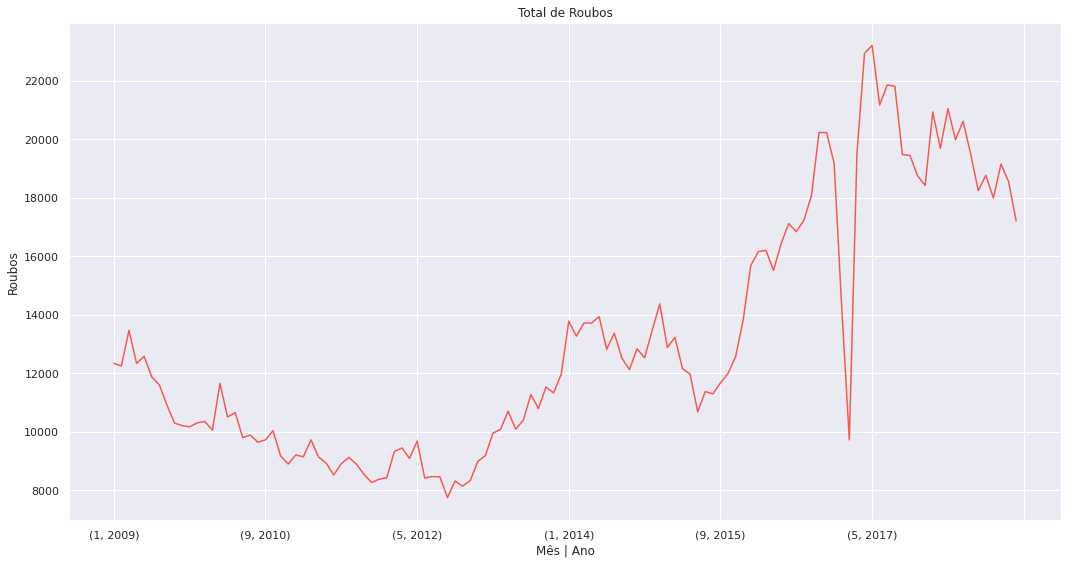

In [27]:
#configurando gráfico de linhas
fig, ax= plt.subplots()

df_clean.total_roubos.plot(figsize=(15,8), color='#f55951');
ax.set_xlabel('Mês | Ano')
ax.set_ylabel("Roubos")
ax.set_title('Total de Roubos')
plt.tight_layout()

Visualizando este gráfico conseguimos perceber que o maior valor de roubos não ocorreu no mesmo ano em que o maior registro de ocorrências.
* Índice superior de registro de ocorrências: **Janeiro de 2014**
* Índice superior de roubos: **Maio de 2017**

**Qual foi o maior registro de roubos registrado no conjunto de dados?**

In [28]:
#valor máximo de roubos registrados no dataset
df_clean.total_roubos.max()

23203

In [29]:
#identificando o ano e mes do maior número de registros para total de roubos
df_clean.loc[(df_clean.total_roubos == 23203)]

,,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias
mes,vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,2017,425,1.0,20,97.0,504,5190,419.0,188.0,2755.0,669,124,4596,1240,9669,1616,1,12.0,2548.0,7.0,53.0,2655,23203,1302,1866,813.0,1410.0,8359,13993,1.0,156.0,17.0,3059.0,1862,610.0,1114.0,182.0,3522,2982.0,639.0,1443.0,128.0,4650.0,379.0,18,4.0,1.0,0.0,543,13833,4596,71895.0


Agora que já temos uma análise geral sobre estes roubos, está na hora de buscar algo mais a fundo sobre estes crimes.

In [30]:
#lista para armazenar os valores das somas anuais dos crimes 
crime_roubo=[]

#laço for para fazer uma iteração sobre o df e calcular a soma 
for i in df_roubo:
  crime_roubo.append(df_roubo[i].values.sum())

#criando Series para a soma de todos os roubos
soma_roubo = pd.Series(data=crime_roubo, index= df_roubo.columns).sort_values(ascending=False)

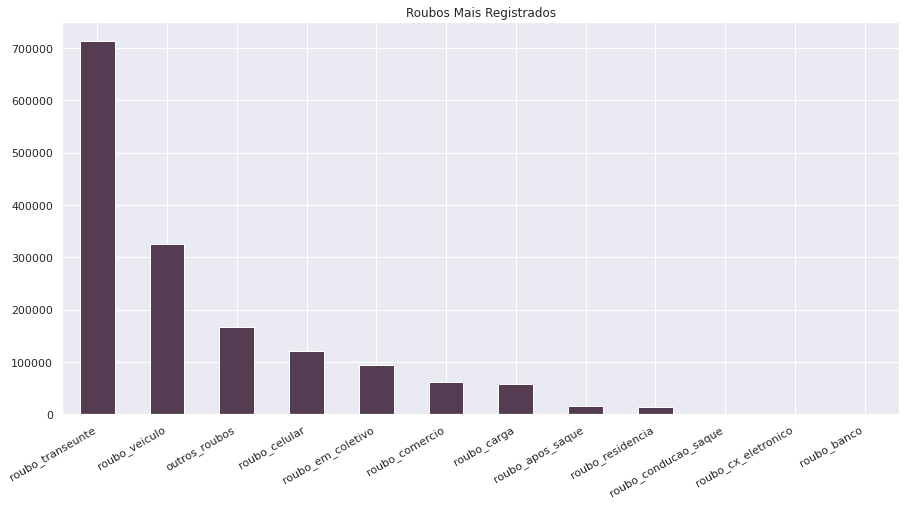

In [31]:
#configurando gráfico de barras (roubos)
fig,ax = plt.subplots()

soma_roubo.plot.bar(figsize=(15,8), color='#543c52');
ax.set_title("Roubos Mais Registrados")
fig.autofmt_xdate()

Algumas conclusões tiradas a partir da análise dos roubos entre 2009 - 2018:
* O roubo mais registrado neste período foi o `roubo_transeunte` com **713 mil registros**
* O roubo com menos indice de registros neste período foi `roubo_banco` com **264 ocorrências**
* Os maiores Índices de roubos e registros de ocorrências aconteceram em anos diferentes

###**Furtos**

Agora, irei analisar especificamente os crimes relacionados a furtos no período apurado.

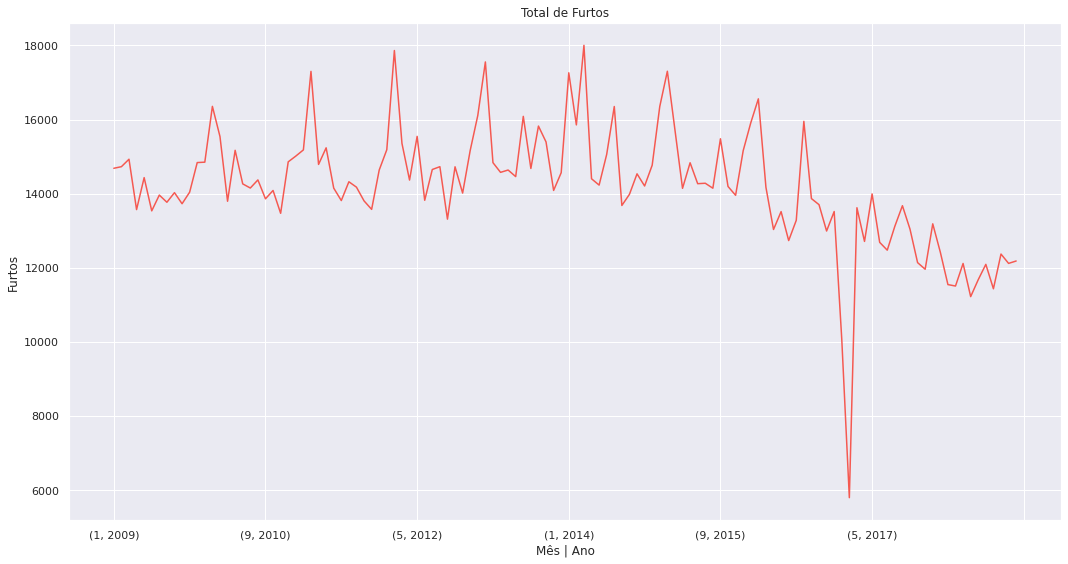

In [32]:
#configurando gráfico de linhas (furtos)
fig, ax = plt.subplots()
df_clean.total_furtos.plot(figsize= (15,8), color='#f55951')
ax.set_xlabel('Mês | Ano')
ax.set_ylabel("Furtos")
ax.set_title('Total de Furtos')
plt.tight_layout()

Entre 2009 a 2016, nota-se que os valores variam entre **14 mil a 18 mil** casos por mês, e no final de 2018 os valores tem uma descida chegando a **12 mil** casos por mês, o que corresponde a sua média estando em **14.192 crimes registrados**.

In [33]:
#valor máximo de furtos registrados no dataset
df_clean.total_furtos.max()

18003

In [34]:
#identificando o ano e mes do maior número de registros para total de furtos
df_clean.loc[(df_clean.total_furtos == 18003)]

,,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias
mes,vano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,2014,510,5.0,10,46.0,544,8357,479.0,214.0,3938.0,773,125,2947,401,7014,639,2,4.0,555.0,16.0,94.0,1141,13711,1640,4564,974.0,1577.0,9248,18003,1.0,175.0,17.0,2745.0,2046,871.0,1002.0,228.0,2355,3154.0,1077.0,1533.0,60.0,8154.0,563.0,59,2.0,5.0,0.0,571,8208,2947,72915.0


Ao contrário dos roubos, os maiores índices de crimes relacionados a furtos aconteceram no mesmo ano em que o dataset registrou o maior número de ocorrências.

In [35]:
#lista para armazenar os valores das somas anuais dos crimes 
crime_furto=[]

#laço for para fazer uma iteração sobre o df e calcular a soma 
for i in df_furto:
  crime_furto.append(df_furto[i].values.sum())

soma_furto = pd.Series(data=crime_furto, index= df_furto.columns).sort_values(ascending=False)


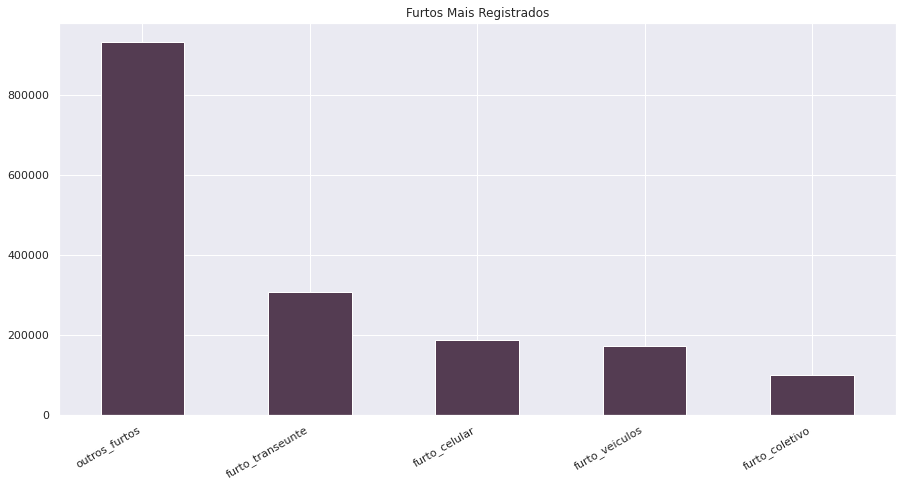

In [36]:
#configurando gráfico de barras (furtos)
fig,ax = plt.subplots()

soma_furto.plot.bar(figsize=(15,8), color='#543c52');
ax.set_title("Furtos Mais Registrados")
fig.autofmt_xdate()

Dentre os furtos, o que teve mais ocorrências foi o "outros_furtos", esta categoria de furtos engloba todos os tipos de furtos que não estão relacionados no dataset. 

Mais uma vez, crimes relacionado a transeunte tem se destacado, neste gráfico, contemplando o **2º furto que teve mais casos registrados.**

Mas algo de positivo foi a diminuição deste crime ao longo dos anos, uma queda de quase **3 mil casos por mês**.

##**Crimes Contra o Patrimônio (Veículos)**

Ao longo dessa análise conseguimos perceber que crimes relacionados a automóveis tem se destacado valores elevados. Então, irei analisar mais a fundo sobre estes crimes. O conjunto de dados também disponibiliza a recuperação dos carros, sendo assim, conseguimos podemos extrair algumas informações, como:
* Em algum momento, a taxa de veículos recuperados sobressaiu a taxa de carros levados?
* No Rio de Janeiro, os automóveis no período analisado, foram mais roubados ou furtados?  

Primeiro, irei atribuir a um novo dataframe somente as variáveis relacionadas a carros, facilitando na plotagem de gráficos e futuras a análises.


In [37]:
# criando um df apenas relacionados a carros
df_automoveis = df_clean[['roubo_veiculo', 'furto_veiculos', 'recuperacao_veiculos']]

A seguir, irei plotar um gráfico de linhas para demonstrar a distribuição dessas variáveis ao longo do período analisado.

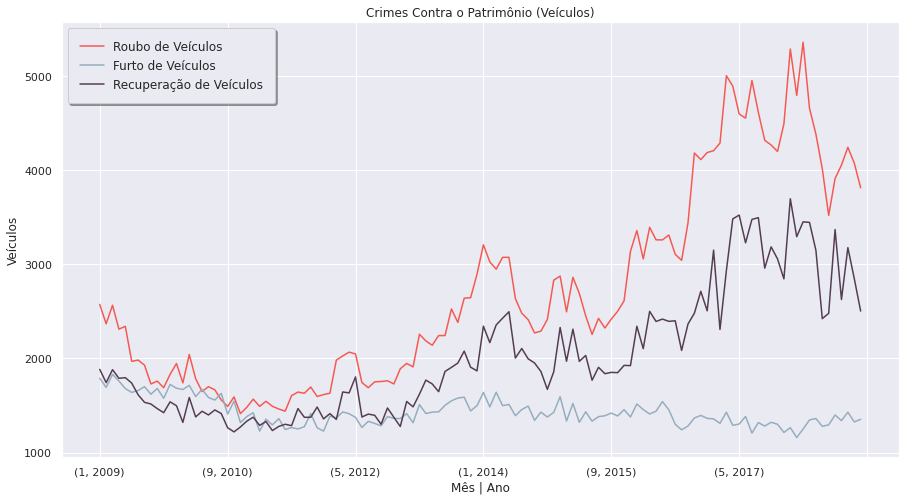

In [38]:
#configurando gráficos de linhas (crimes contra o patrimônio)
fig, ax = plt.subplots(figsize=(15,8))

df_automoveis.plot(ax=ax, color=['#f55951', "#95adbe", '#543c52'] )
ax.set_title("Crimes Contra o Patrimônio (Veículos)")
ax.set_xlabel("Mês | Ano")
ax.set_ylabel("Veículos")
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize='medium', labels=('Roubo de Veículos', "Furto de Veículos", "Recuperação de Veículos"))
plt.show() 

Analisando este gráfico conseguimos responder as perguntas citadas acima e extrair novas informações.

* A taxa de carros recuperados **NUNCA** esteve acima dos carros levados. Isso comprova ineficiência da polícia carioca em recuperar os carros que foram perdidos.

* Após o gráfico, facilmente podemos identificar que o índice de carros roubados é muito superior aos outros dois analisados.

Olhando para o gráfico, conseguimos notar mais ou menos onde foi o ponto de início da recuperação dos automóveis se tornarem mais altas do que os furtos, mas quando exatamente isso ocorreu? 


In [39]:
#buscando o ultimo mês que os furtos estiveram mais altos que a recuperação
df_automoveis.loc[(df_automoveis.furto_veiculos > df_automoveis.recuperacao_veiculos)]

,,roubo_veiculo,furto_veiculos,recuperacao_veiculos
mes,vano,,,
7,2009,1982,1659,1613
8,2009,1928,1699,1533
9,2009,1728,1619,1515
10,2009,1758,1680,1466
11,2009,1688,1576,1423
12,2009,1830,1723,1538
1,2010,1945,1683,1497
2,2010,1739,1669,1320
3,2010,2041,1713,1584


O gráfico nos mostra que a recuperação de veículos, nunca ultrapassou o faixa de carros roubados, mas que desde 2013 se manteve mais alta do que os furtos de carros, algo realmente positivo.


###**Quando ocorreu a taxa mais alta de veículos roubados durante este período?**

In [40]:
#buscando o valor mais alto de carros roubados
df_automoveis.roubo_veiculo.max()

5358

In [41]:
#buscando o mês e ano que a maior taxa de roubos ocorreu
df_automoveis.loc[(df_automoveis.roubo_veiculo == 5358)]

,,roubo_veiculo,furto_veiculos,recuperacao_veiculos
mes,vano,,,
3,2018,5358,1249,3450


In [42]:
#média por dia de carros roubados em Março de 2018 
print("Média por dia: {:.1f}".format(5358 / 31))

Média por dia: 172.8


No mês de Março no ano de 2018, foram registrados cerca de **5358 roubos** na cidade carioca, contabilizando uma **média de quase 173 carros roubados por dia**.

Estes valores identificam a ineficiência da polícia em recuperar carros levados na cidade do Rio de Janeiro no período de 2009 à 2018.

###**Qual a porcentagem de carros recuperados ao longo do período apurado?**

In [43]:
#soma dos carros furtados e roubados
carros_levados = (df_automoveis.roubo_veiculo.sum()) + (df_automoveis.furto_veiculos.sum())

#porcentagem dos carros recuperados
porcentagem_recuperados = (df_automoveis.recuperacao_veiculos.sum()) / (carros_levados) *100

print("A soma de carros furtados + carros roubados no período apurado, foi de: {:.2f}\n".format(carros_levados))
print("O total de carros recuperados neste período, somam: {:.2f}\n".format(df_automoveis.recuperacao_veiculos.sum()))
print("A porcentagem dos veículos recuperados no período apurado, foi de: {:.1f}%".format(porcentagem_recuperados))

A soma de carros furtados + carros roubados no período apurado, foi de: 497279.00

O total de carros recuperados neste período, somam: 243082.00

A porcentagem dos veículos recuperados no período apurado, foi de: 48.9%


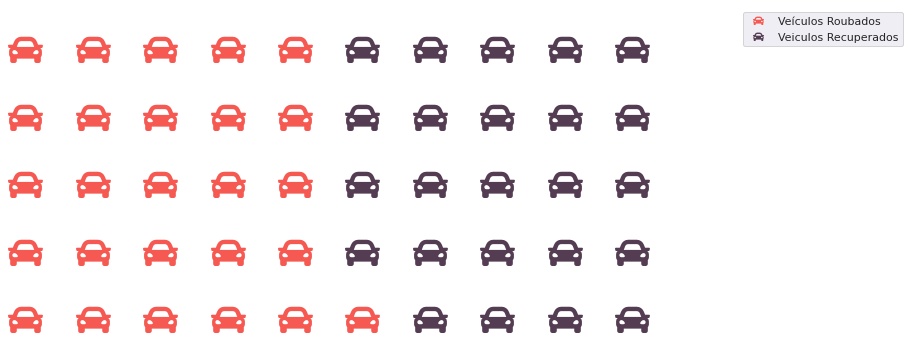

In [44]:
#configurando o gráfico sobre a porcentagem de veículos recuperados
data = {'Veículos Roubados': 51.1,'Veiculos Recuperados': 48.9}

fig = plt.figure(   
                    FigureClass= Waffle,
                    figsize=(12,6),
                    rows= 5,
                    columns= 10,
                    colors=('#f55951', "#543c52"),
                    values= data, icons= 'car', icon_size=35,
                    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
                    icon_legend=True
)
fig.set_tight_layout(False)
plt.rcParams['legend.fontsize'] = 20
plt.show()

Infelizmente apenas **243.082 pessoas** de **497.279** tiveram seus bens recuperados após eles terem sido levados.

Inacreditável pensar que estas pessoas tiveram apenas **48.9%** de chances de que seus carros fossem recuperados.

##**Abuso Sexual**

Neste tópico, infelizmente irei abordar um crime em específico, o **estupro**.

In [45]:
#definindo um dataset para crimes de abuso (estupro)
df_estupro = df_clean.estupro

In [46]:
#estatísticas básicas
df_estupro.describe()

count    120.000000
mean     425.583333
std       61.316863
min      230.000000
25%      387.250000
50%      423.500000
75%      473.000000
max      561.000000
Name: estupro, dtype: float64

Gostaria de chamar a atenção para o valor mínimo apresentado no método `describe()`. **TODOS** os meses durante **DEZ ANOS** registraram ocorrências de estupros no Rio de Janeiro, não teve **NENHUM** mês onde esta variável foi 0.

###**Distribuição da variável**

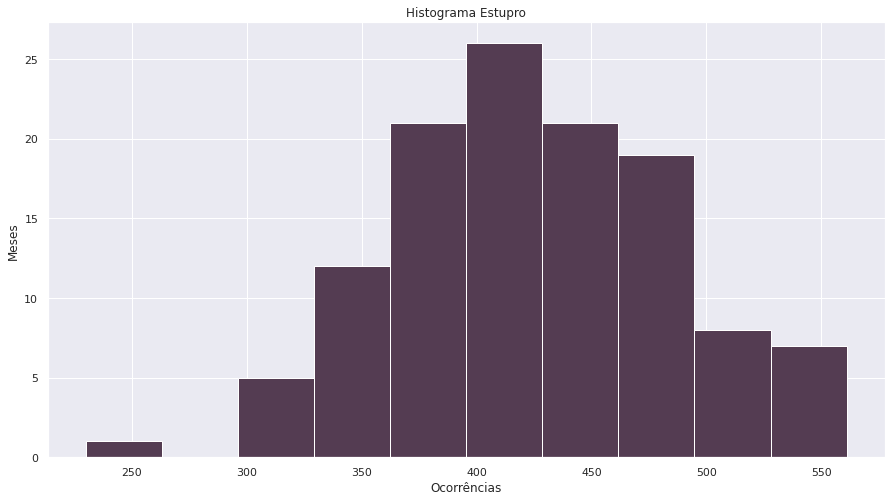

In [47]:
#configurando o histograma (estupro) 
fig, ax = plt.subplots(figsize= (15,8))
ax.hist(df_estupro, color=['#543c52'])
ax.set_title("Histograma Estupro")
ax.set_xlabel("Ocorrências")
ax.set_ylabel("Meses")
plt.show()


###**Como isso pode realmente acontecido?**


O histograma nos mostra, infelizmente, que neste periodo mais de **25 meses** registraram **400 estupros**. Com valor máximo de mais de 550 pessoas.


Extremamente repugnante saber que aconteceram **QUINHENTOS E CINQUENTA** estupros em **um único mês**, este valor não deveria acontecer em centenas de anos. Lamentavelmente, mas essa foi a realidade para muitos que habitam a cidade "maravilhosa", durante estes 10 anos.


##**Crimes Contra a Vida**
Chegamos ao último tópico desta análise exploratória. Neste item, irei analisar mais a fundo alguns crimes que tem a finalidade ferir outra pessoa, sendo de maneira direta ou indireta.

Especificamente, irei analisar as variáveis `hom_doloso`, `hom_culposo`.


In [48]:
#criando um df para crimes contra a vida
df_life = df.iloc[216:336, [0, 2, 9]]

###**Em qual ano teve a maior média de homicídios?**

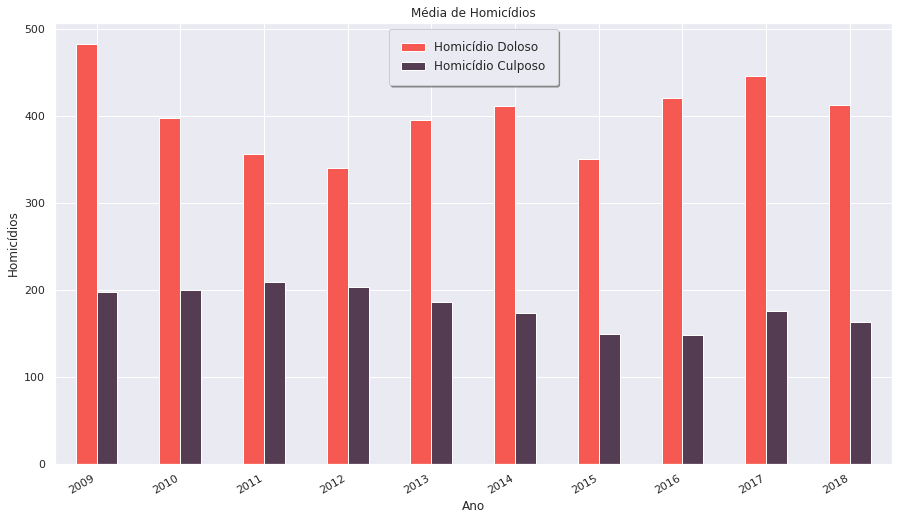

In [49]:
fig, ax = plt.subplots(figsize=(15,9))

#definindo tipo de gráfico, axis e cores utilizadas
df_life.groupby('vano').mean().plot(kind='bar', ax=ax, color=['#f55951', "#543c52"])

#adicionando estilização a legenda
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize='medium', labels= ('Homicídio Doloso', 'Homicídio Culposo'))

#setando título e labels
ax.set_title("Média de Homicídios")
ax.set_xlabel("Ano")
ax.set_ylabel("Homicídios")

fig.autofmt_xdate()
plt.show()

A partir da visualização deste gráfico, podemos tirar as seguintes informações:
* Houve mais **homicídios dolosos** do que culposos ao longo do período apurado;
* A maior média de homicídios dolosos ocorreu em **2009** chegando a quase **500 registros**;
* Embora o ano de 2017 ter o menor número de registros de ocorrências, os homicídios dolosos se mantiveram altos, batendo a segunda maior média de mortes durante o período apurado.

#**Considerações Finais**

Com base nos fatos apresentados, uma solução seria o governo do Rio de Janeiro tomar as mesmas medidas que foram aplicadas em Fevereiro de 2017. Ano em que foi registrado o menor número de ocorrências na cidade. 

Em um mundo ideal isso seria a melhor opção, mas no mês de Fevereiro se inicia o Carnaval aqui no Brasil, então o governo da cidade investe mais em segurança pública do que no restante dos outros meses. Embora o que foi feito em Fevereiro de 2017 tenha funcionado, os registros de homicídios dolosos se mantiveram altos, então, não basta somente serem tomadas as mesmas decisões, necessita de um plano para intervir os homicídios na cidade carioca.

Esta análise nos mostrou uma realidade que provavelmente muito de nós já sabiamos sobre o Rio de Janeiro. Entretanto, visualizar a quantidade de crimes registrados em números nos faz refletir de maneira diferente.